<a href="https://colab.research.google.com/github/chidoziemanagwu/sdf_hashnerf/blob/main/Chidozie_SDF_HASHNERF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into '/content/drive/MyDrive/sdf_hashnerf'...
remote: Enumerating objects: 35, done.
remote: Total 35 (delta 0), reused 0 (delta 0), pack-reused 35 (from 1)
Receiving objects: 100% (35/35), 59.63 MiB | 15.92 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (18/18), done.
Repository cloned successfully
/content/drive/MyDrive/sdf_hashnerf
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.0 MB/s eta 0:00:00


<ipython-input-2-c5d05c67a5d7>:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))
/usr/local/lib/python3.10/dist-packages/t

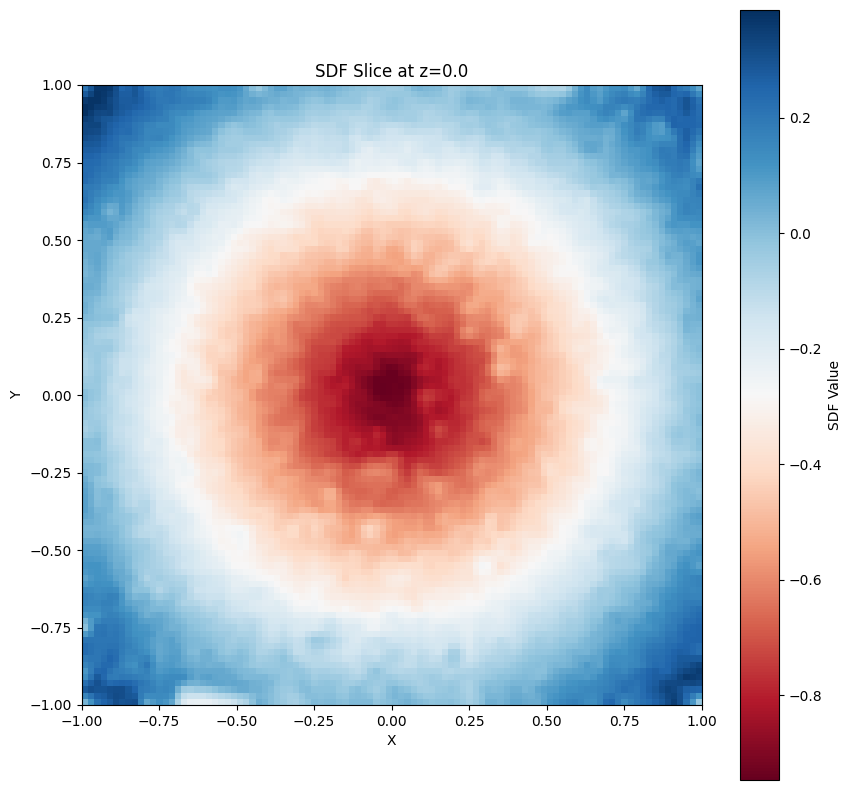

In [2]:
import os

# # Step 1: Create /content directory if it doesn't exist
# !mkdir -p /content

# # Step 2: Remove sdf_hashnerf if it exists
!rm -rf /content/drive/MyDrive/sdf_hashnerf

# Step 3: Clone the repository
!git clone https://github.com/chidoziemanagwu/sdf_hashnerf.git /content/drive/MyDrive/sdf_hashnerf

# Step 4: Verify the clone was successful
if os.path.exists('/content/drive/MyDrive/sdf_hashnerf'):
    print("Repository cloned successfully")
    # Navigate to the project directory
    %cd /content/drive/MyDrive/sdf_hashnerf

    # Install dependencies
    !pip install -r requirements.txt

    # Add to Python path
    import sys
    sys.path.append('/content/drive/MyDrive/sdf_hashnerf')

    # Show directory structure
    print("\nDirectory structure:")
    !ls -R /content/drive/MyDrive/sdf_hashnerf

    # Continue with the rest of your code
    import torch
    try:
        from src.models import SDFNetwork
        from src.encoding import HashGridSDF
        from src.utils.visualization import visualize_sdf_slice

        # Initialize the hash encoder
        hash_encoder = HashGridSDF(
            n_levels=16,
            n_features_per_level=2,
            log2_hashmap_size=19,
            base_resolution=16,
            finest_resolution=512
        )

        # Initialize the SDFNetwork with the hash encoder
        model = SDFNetwork(hash_encoder)

        # Load the trained model checkpoint
        checkpoint_path = "/content/drive/MyDrive/sdf_hashnerf/checkpoints/best_model.pth"
        if os.path.exists(checkpoint_path):
            model.load_state_dict(torch.load(checkpoint_path))
            model.eval()

            # Visualize the SDF slice
            visualize_sdf_slice(model, resolution=100, z_value=0.0,
                              device='cuda' if torch.cuda.is_available() else 'cpu')
        else:
            print(f"Checkpoint file not found at: {checkpoint_path}")

    except ImportError as e:
        print(f"Import Error: {e}")
        print("Current sys.path:", sys.path)
        print("\nContents of current directory:")
        !ls -R

else:
    print("Failed to clone repository. Please check the repository URL and your internet connection.")